In [8]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,auc,roc_auc_score, classification_report,accuracy_score, recall_score
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
%matplotlib inline

In [2]:
df= pd.read_csv("creditcard.csv")

In [3]:
class_dist=df['Class'].value_counts()
print(class_dist)
print('\nClass 0: {:0.2f}%'.format(100 *class_dist[0] / (class_dist[0]+class_dist[1])))
print('Class 1: {:0.2f}%'.format(100 *class_dist[1] / (class_dist[0]+class_dist[1])))

0    284315
1       492
Name: Class, dtype: int64

Class 0: 99.83%
Class 1: 0.17%


([<matplotlib.axis.XTick at 0x1ed022efb80>,
 [Text(0, 0, 'Genuine'), Text(1, 0, 'Fraud')])

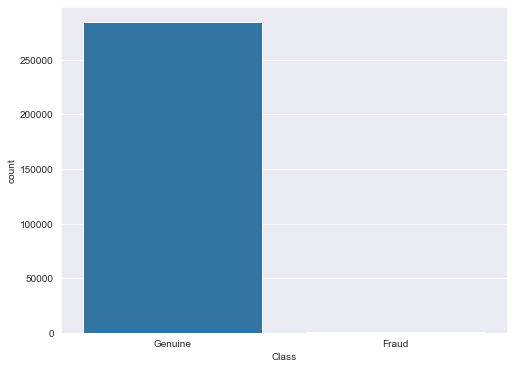

In [4]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x= 'Class', data= df)
Labels= ('Genuine', 'Fraud')
plt.xticks(range(2), Labels)

In [5]:
X = df.drop(columns=['Time','Class'])
y = df['Class']

x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=100,test_size=0.3,stratify=y)

Recall Score  0.6351351351351351
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.83      0.64      0.72       148

    accuracy                           1.00     85443
   macro avg       0.92      0.82      0.86     85443
weighted avg       1.00      1.00      1.00     85443



<AxesSubplot:>

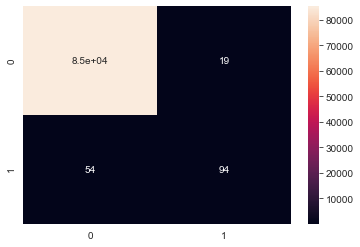

In [10]:
lr = LogisticRegression() 
lr.fit(x_train, y_train.ravel()) 
predictions = lr.predict(x_test) 
  
print('Recall Score ',recall_score(y_test,predictions))
print(classification_report(y_test, predictions)) 
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='.2g')

In [11]:
print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
 
undersample = RandomUnderSampler(sampling_strategy='majority')
X_train_res, y_train_res = undersample.fit_resample(x_train, y_train.ravel())
  
print('After UnderSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After UnderSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After UnderSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before UnderSampling, counts of label '1': 344
Before UnderSampling, counts of label '0': 199020 

After UnderSampling, the shape of train_X: (688, 29)
After UnderSampling, the shape of train_y: (688,) 

After UnderSampling, counts of label '1': 344
After UnderSampling, counts of label '0': 344


([<matplotlib.axis.XTick at 0x1ed029b0340>,
 [Text(0, 0, 'Genuine'), Text(1, 0, 'Fraud')])

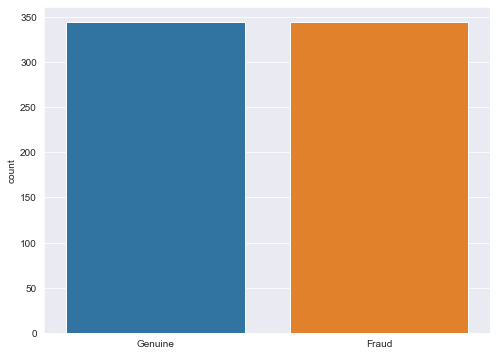

In [12]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x= y_train_res, data= df)
Labels= ('Genuine', 'Fraud')
plt.xticks(range(2), Labels)

Recall Score  0.8716216216216216
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85295
           1       0.04      0.87      0.08       148

    accuracy                           0.96     85443
   macro avg       0.52      0.92      0.53     85443
weighted avg       1.00      0.96      0.98     85443



<AxesSubplot:>

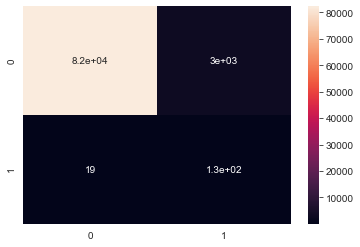

In [13]:
lr = LogisticRegression() 
lr.fit(X_train_res, y_train_res.ravel()) 
predictions = lr.predict(x_test) 
  
print('Recall Score ',recall_score(y_test,predictions))
print(classification_report(y_test, predictions)) 
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='.2g')